In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
# Load the dataset
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
# Drop rows with null values in Date column
df.dropna(subset=['Date'], inplace=True)

In [9]:
# Check for and handle any remaining null values in other columns
df.dropna(inplace=True)

In [10]:
# Ensure correct data types
df['Quantity'] = df['Quantity'].astype(int)
df['Price per Unit'] = df['Price per Unit'].astype(float)
df['Total Amount'] = df['Total Amount'].astype(float)

In [11]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [12]:
category_stats = df.groupby('Product Category')['Total Amount'].agg(['mean', 'sum', 'count']).sort_values(by='sum', ascending=False)
print("Category-wise Total Sales and Count:\n", category_stats)

Category-wise Total Sales and Count:
                         mean       sum  count
Product Category                             
Electronics       458.786550  156905.0    342
Clothing          443.247863  155580.0    351
Beauty            467.475570  143515.0    307


In [13]:
gender_sales = df.groupby('Gender')['Total Amount'].mean()
print("Gender-wise Average Spending:\n", gender_sales)

Gender-wise Average Spending:
 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


In [14]:
age_spending = df.groupby(pd.cut(df['Age'], bins=5))['Total Amount'].mean()
print("Age Group-wise Spending:\n", age_spending)

Age Group-wise Spending:
 Age
(17.954, 27.2]    504.275701
(27.2, 36.4]      481.257143
(36.4, 45.6]      442.593583
(45.6, 54.8]      437.067308
(54.8, 64.0]      417.546296
Name: Total Amount, dtype: float64


In [15]:
# Aggregate total sales over time
daily_sales = df.groupby('Date')['Total Amount'].sum()

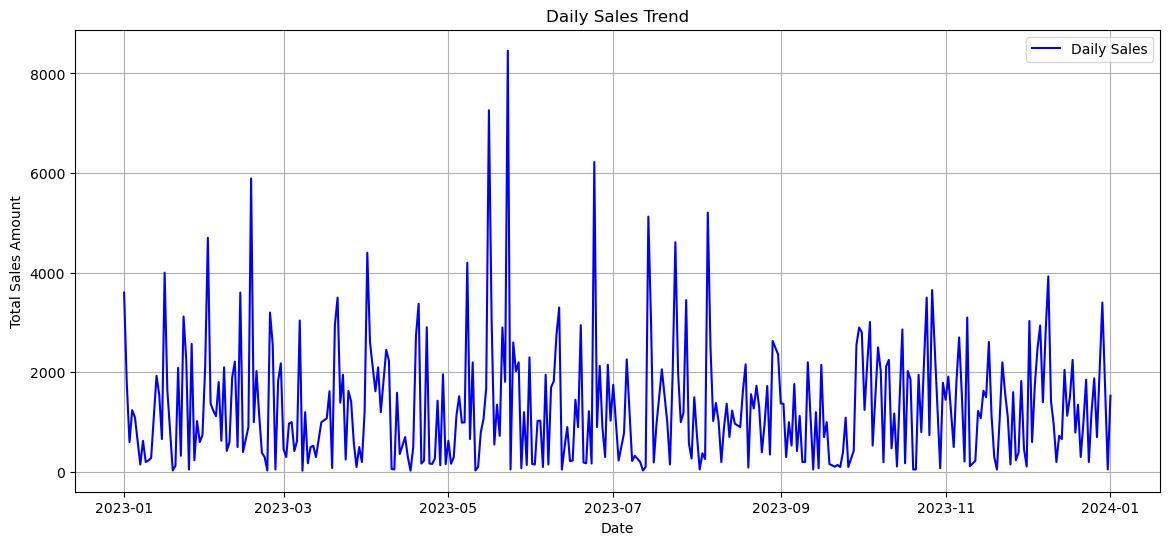

In [16]:
# Plot daily sales trend
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid()
plt.show()

In [17]:
# Monthly Sales Trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum()

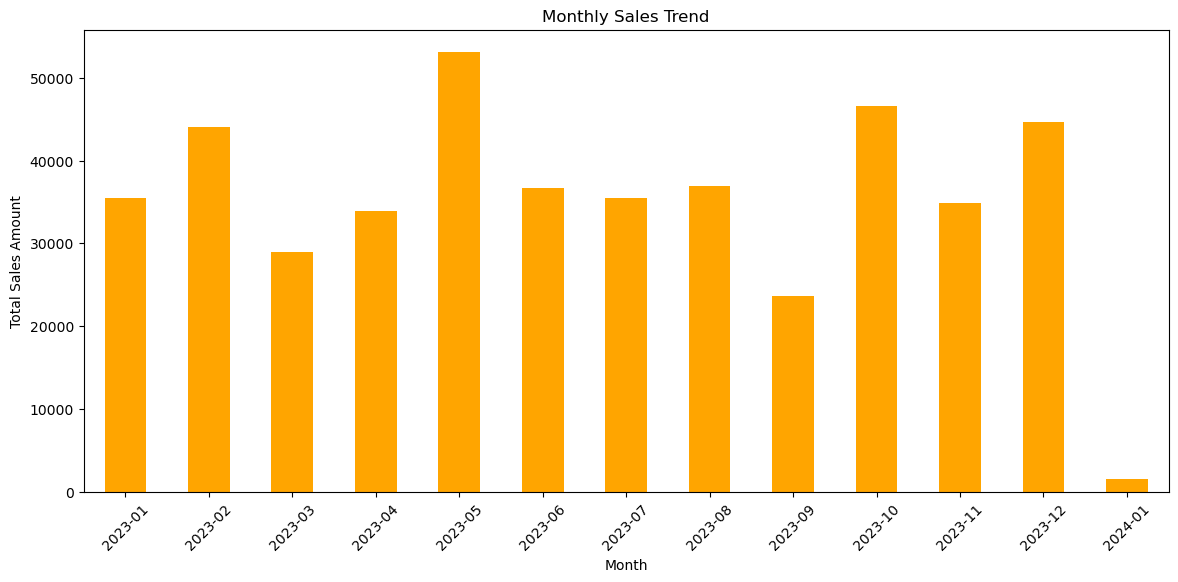

In [18]:
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='bar', color='orange')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

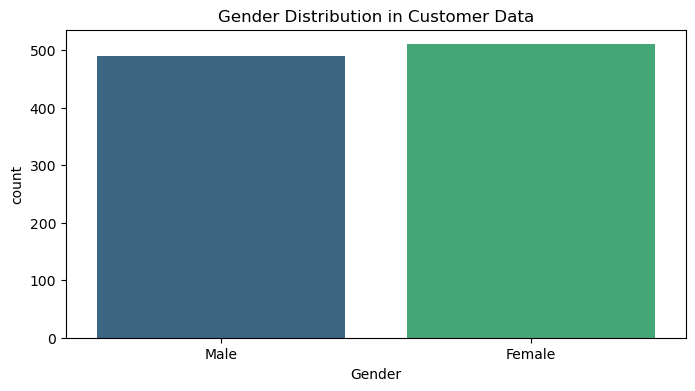

In [19]:
# Gender Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df, palette="viridis")
plt.title("Gender Distribution in Customer Data")
plt.show()

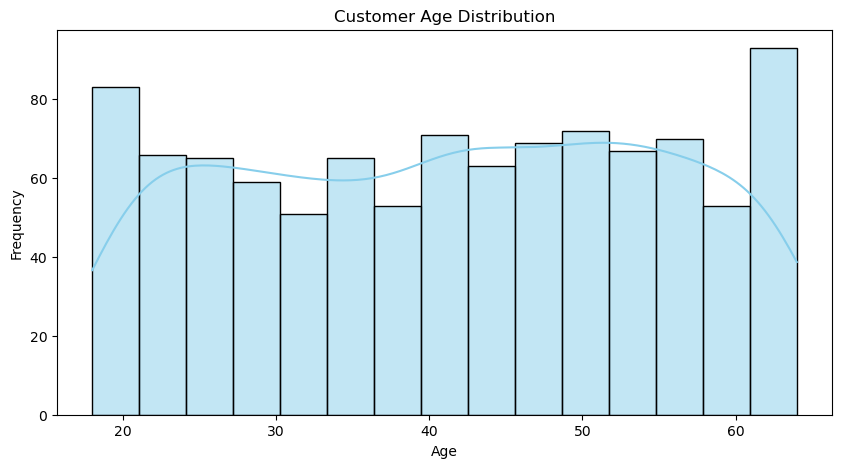

In [20]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=15, kde=True, color="skyblue")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Top 5 Product Categories by Total Sales
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(5)
top_products

Product Category
Electronics    156905.0
Clothing       155580.0
Beauty         143515.0
Name: Total Amount, dtype: float64

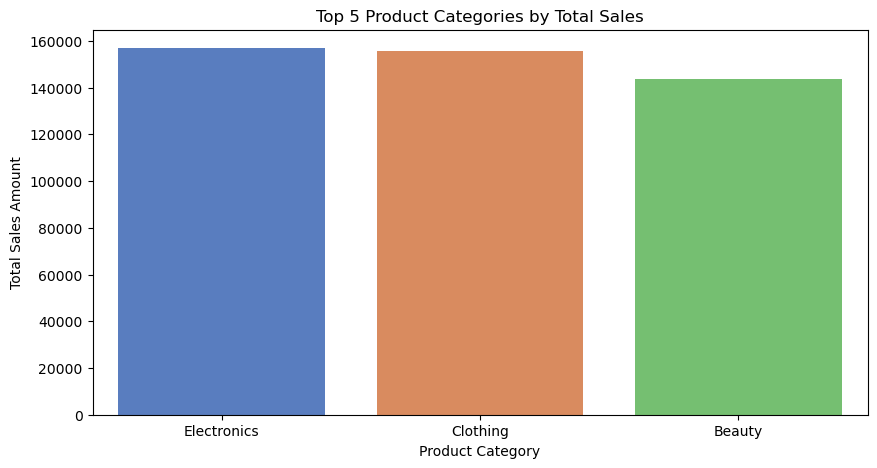

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="muted")
plt.title("Top 5 Product Categories by Total Sales")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.show()

In [23]:
# Heatmap for Day and Month Sales Distribution
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [24]:
heatmap_data = df.pivot_table(index='Day', columns='Month', values='Total Amount', aggfunc='sum')

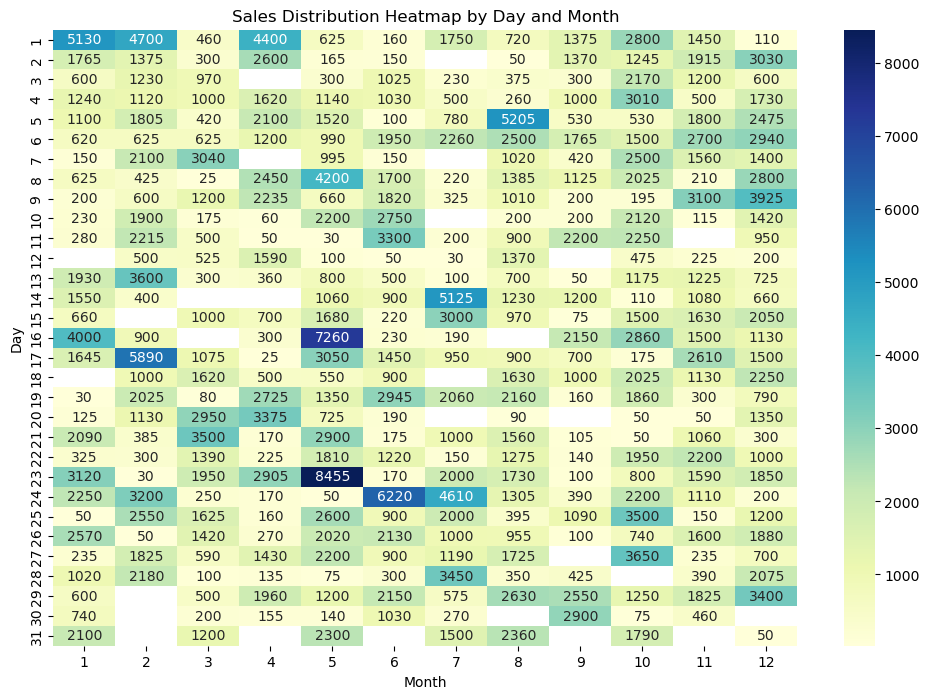

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Sales Distribution Heatmap by Day and Month")
plt.xlabel("Month")
plt.ylabel("Day")
plt.show()

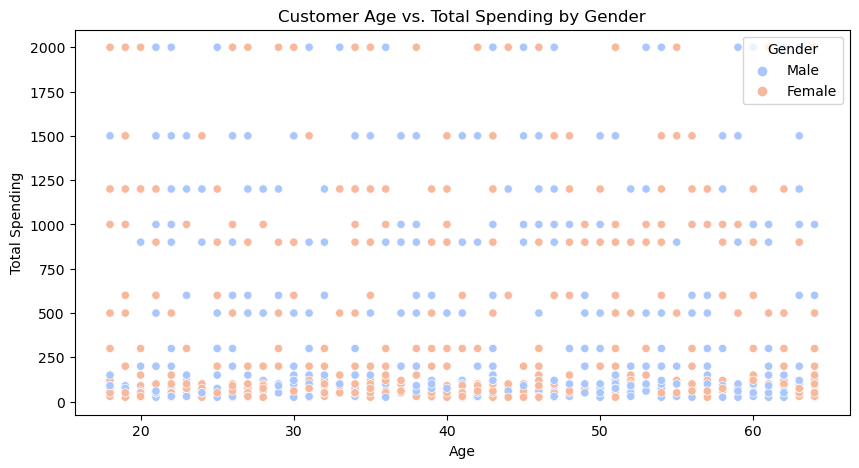

In [26]:
# Customer Age vs. Total Spending with Gender Hue
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Total Amount', data=df, hue='Gender', palette="coolwarm")
plt.title("Customer Age vs. Total Spending by Gender")
plt.xlabel("Age")
plt.ylabel("Total Spending")
plt.show()

In [27]:
# Quantity Sold for Top Categories
top_categories = df['Product Category'].value_counts().head(5).index
quantity_data = df[df['Product Category'].isin(top_categories)].groupby(['Product Category', 'Quantity']).size().unstack()

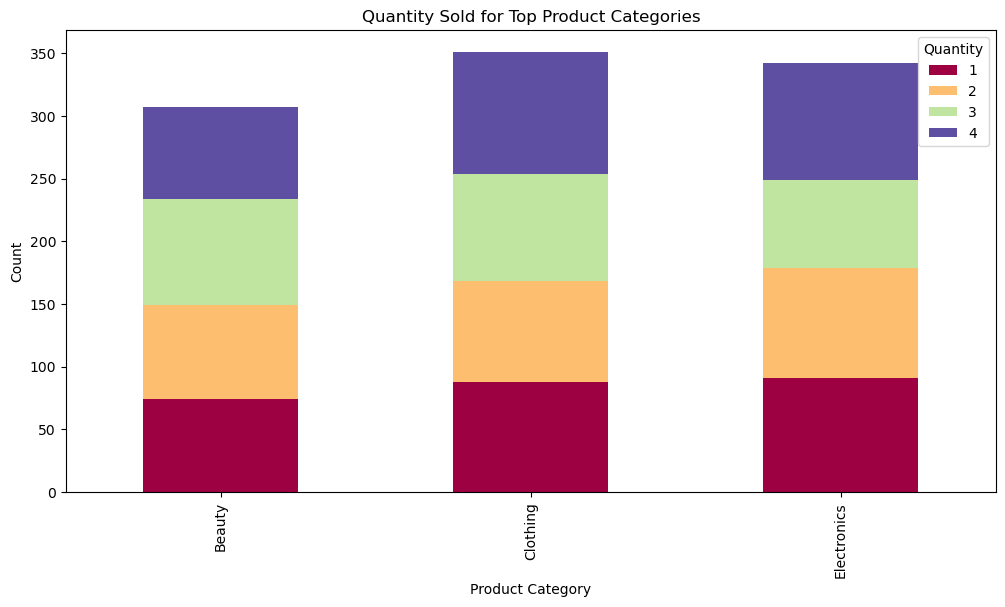

In [28]:
quantity_data.plot(kind='bar', stacked=True, colormap="Spectral", figsize=(12, 6))
plt.title("Quantity Sold for Top Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.legend(title="Quantity")
plt.show()

In [29]:
# Top Product Categories by Total Sales
top_product_categories = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(5)
print("Top Product Categories by Total Sales:\n", top_product_categories)

# Top Products by Quantity Sold
top_products_quantity = df.groupby(['Product Category', 'Product Category'])['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop Products by Quantity Sold:\n", top_products_quantity)

# Recommendations Based on Product Performance
print("\nRecommendations:")

for category in top_product_categories.index:
    print(f"\nFor the '{category}' Category:")
    
    # Focusing on high-sales categories, we recommend prioritizing these products.
    if category == "Electronics":
        print("  1. Stock up on popular electronics items like smartphones and accessories.")
        print("  2. Offer discounts on bundled accessories with main products.")
        
    elif category == "Clothing":
        print("  1. Highlight seasonal clothing items in high demand.")
        print("  2. Run gender-targeted promotions for high-demand apparel.")
        
    elif category == "Home Appliances":
        print("  1. Focus on high-ticket items like refrigerators and washing machines.")
        print("  2. Provide financing options or EMI offers to boost sales for costlier products.")
        
    elif category == "Furniture":
        print("  1. Emphasize durable and aesthetic furniture items popular in certain age demographics.")
        print("  2. Highlight furniture for seasonal sales or holidays.")
        
    elif category == "Toys":
        print("  1. Market toys and games during school holiday periods.")
        print("  2. Bundle items for promotional discounts targeting parents.")


Top Product Categories by Total Sales:
 Product Category
Electronics    156905.0
Clothing       155580.0
Beauty         143515.0
Name: Total Amount, dtype: float64

Top Products by Quantity Sold:
 Product Category  Product Category
Clothing          Clothing            894
Electronics       Electronics         849
Beauty            Beauty              771
Name: Quantity, dtype: int32

Recommendations:

For the 'Electronics' Category:
  1. Stock up on popular electronics items like smartphones and accessories.
  2. Offer discounts on bundled accessories with main products.

For the 'Clothing' Category:
  1. Highlight seasonal clothing items in high demand.
  2. Run gender-targeted promotions for high-demand apparel.

For the 'Beauty' Category:
